In [97]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Directory containing the cleaned CSV files
CLEANED_DIR = Path.cwd().parent.parent / "data" / "processed" / "cleaned_data"
CRIME_DATA = CLEANED_DIR / "cleaned_crime_data.csv"
ECONOMIC_DATA = CLEANED_DIR / "cleaned_economic_data.csv"
EDUCATION_DATA = CLEANED_DIR / "cleaned_education_data.csv"
HOUSING_DATA = CLEANED_DIR / "cleaned_housing_data.csv"
JOB_OPENINGS_DATA = CLEANED_DIR / "cleaned_job_openings_data.csv"


In [98]:
# crime_df = pd.read_csv(CRIME_DATA)
economic_df = pd.read_csv(ECONOMIC_DATA)
education_df = pd.read_csv(EDUCATION_DATA)
housing_df = pd.read_csv(HOUSING_DATA)
job_openings_df = pd.read_csv(JOB_OPENINGS_DATA)

# Merge all dataframes on COUNTY_FIPS
merged_df = economic_df.merge(
    education_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'Year'], how='inner'
).merge(
    housing_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'Year'], how='inner'
).merge(
    job_openings_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'Year'], how='inner'
)

# Drop columns containing 'z_score'
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('z_score', case=False)]

In [100]:
merged_df.columns


Index(['MEDIAN_INCOME', 'TOTAL_EMPLOYED_POPULATION', 'UNEMPLOYED_PERSONS',
       'TOTAL_LABOR_FORCE', 'COUNTY_FIPS', 'Year', 'UNEMPLOYMENT_RATE',
       'POPULATION', 'STATE', 'COUNTY', 'NAME', 'TOTAL_POPULATION_25_64',
       'LESS_THAN_HIGH_SCHOOL_TOTAL', 'HIGH_SCHOOL_GRADUATE_TOTAL',
       'SOME_COLLEGE_TOTAL', 'BACHELORS_OR_HIGHER_TOTAL',
       'TOTAL_ENROLLED_AND_NOT_ENROLLED', 'TOTAL_ENROLLED',
       'ENROLLED_NURSERY_PRESCHOOL', 'ENROLLED_KINDERGARTEN',
       'ENROLLED_GRADE1_4', 'ENROLLED_GRADE5_8', 'ENROLLED_GRADE9_12',
       'ENROLLED_COLLEGE_UNDERGRAD', 'ENROLLED_GRADUATE_PROFESSIONAL',
       'LESS_THAN_HIGH_SCHOOL_UNEMPLOYED', 'HIGH_SCHOOL_GRADUATE_UNEMPLOYED',
       'SOME_COLLEGE_UNEMPLOYED', 'BACHELORS_OR_HIGHER_UNEMPLOYED',
       'TOTAL_HOUSING_UNITS', 'OCCUPIED_HOUSING_UNITS', 'MEDIAN_HOUSING_VALUE',
       'MEDIAN_GROSS_RENT', 'HOUSE_AFFORDABILITY', 'JOB_OPENING_JAN',
       'JOB_OPENING_FEB', 'JOB_OPENING_MAR', 'JOB_OPENING_APR',
       'JOB_OPENING_MAY', 'JO

In [ ]:
# Filter merged_df to include only rows where COUNTY_FIPS equals 36029
erie_df = merged_df.loc[merged_df["COUNTY_FIPS"] == 36029].copy()

# Ensure HOUSE_AFFORDABILITY exists before performing calculations
if 'HOUSE_AFFORDABILITY' in erie_df.columns:
    # Create a new column for house affordability percentage
    erie_df['HOUSE_AFFORDABILITY_PERCENT'] = erie_df['HOUSE_AFFORDABILITY'] * 100

    # Group by Year and calculate the mean HOUSE_AFFORDABILITY_PERCENT
    erie_affordability_by_year = erie_df.groupby('Year', as_index=False)['HOUSE_AFFORDABILITY_PERCENT'].mean()

    erie_affordability_by_year.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Optional: Drop rows with NaN if they mess with the plot
    erie_affordability_by_year.dropna(subset=['HOUSE_AFFORDABILITY_PERCENT', 'Year'], inplace=True)

    # Display the result
    display(erie_affordability_by_year)
else:
    print("Column 'HOUSE_AFFORDABILITY' not found in the dataset.")

,Year,HOUSE_AFFORDABILITY_PERCENT
0,2011,31.0
1,2012,31.0
2,2013,31.0
3,2014,31.0
4,2015,31.0
5,2016,30.0
6,2017,30.0
7,2018,30.0
8,2019,30.0
9,2020,29.0


c:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


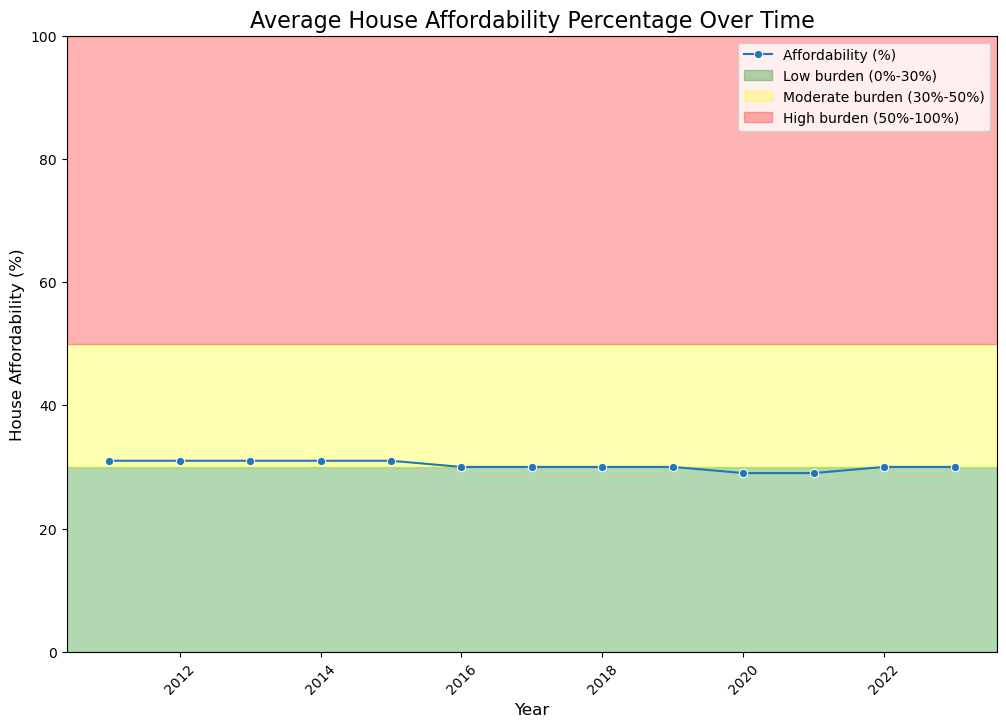

In [103]:
# Check if the required columns exist
if 'HOUSE_AFFORDABILITY' in merged_df.columns and 'Year' in merged_df.columns:

    merged_df['HOUSE_AFFORDABILITY_PERCENT'] = merged_df['HOUSE_AFFORDABILITY'] * 100

    # Group by Year and calculate the mean HOUSE_AFFORDABILITY_PERCENT
    us_affordability_by_year = merged_df.groupby('Year', as_index=False)['HOUSE_AFFORDABILITY_PERCENT'].mean()

    # Create a time series line plot
    plt.figure(figsize=(12, 8))
    sns.lineplot(x='Year', y='HOUSE_AFFORDABILITY_PERCENT', data=erie_affordability_by_year, marker='o', label='Affordability (%)')
    
    # Add a red dotted threshold line at 30%

    plt.axhspan(0, 30, color='green', alpha=0.3, label='Low burden (0%-30%)')
    plt.axhspan(30, 50, color='yellow', alpha=0.3, label='Moderate burden (30%-50%)')
    plt.axhspan(50, 100, color='red', alpha=0.3, label='High burden (50%-100%)')

    # Add titles and labels
    plt.title('Average House Affordability Percentage Over Time', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('House Affordability (%)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)

    plt.ylim(0, 100)  # Set y-axis limits to 0-100%')
    plt.show()
else:
    print("Required columns (HOUSE_AFFORDABILITY or Year) not found in the dataset.")

In [104]:
merged_df["LABOR_FORCE_PERCENTAGE"] = (  merged_df["TOTAL_LABOR_FORCE"] / merged_df["POPULATION"] ) * 100
merged_df["LABOR_FORCE_PERCENTAGE"]

0        54.769188
1        49.222440
2        53.860070
3        49.008915
4        50.693041
           ...    
40391    51.869047
40392    65.330936
40393    48.721184
40394    51.712506
40395    46.217996
Name: LABOR_FORCE_PERCENTAGE, Length: 40396, dtype: float64

In [110]:
# Group by Year and calculate the mean HOUSE_AFFORDABILITY_PERCENT
erie_labor_force_by_year = merged_df.loc[merged_df["COUNTY_FIPS"] == 36029].copy()

erie_labor_force_by_year = merged_df.groupby('Year', as_index=False)['LABOR_FORCE_PERCENTAGE'].mean()

erie_labor_force_by_year["LABOR_FORCE_PERCENTAGE"]

0     47.835987
1     47.658953
2     47.330021
3     47.088001
4     46.850146
5     46.692136
6     46.628160
7     46.522968
8     46.510168
9     46.619046
10    46.475261
11    46.611232
12    46.623417
Name: LABOR_FORCE_PERCENTAGE, dtype: float64

c:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


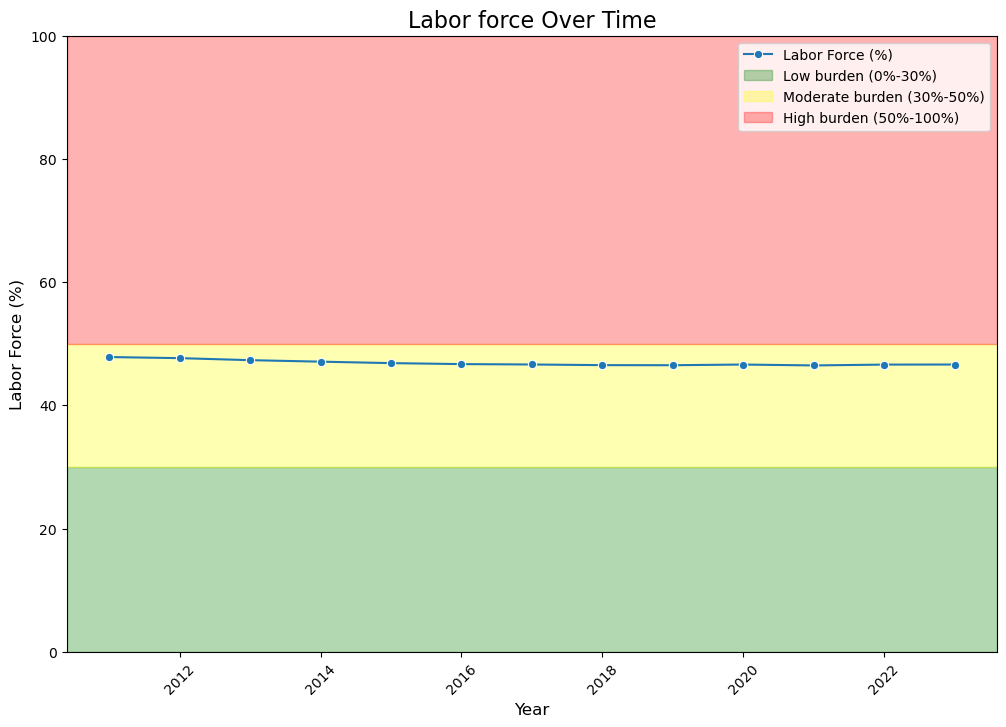

In [ ]:
# Create a time series line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='LABOR_FORCE_PERCENTAGE', data=erie_labor_force_by_year, marker='o', label='Labor Force (%)')

# Add a red dotted threshold line at 30%

plt.axhspan(0, 30, color='green', alpha=0.3, label='Low burden (0%-30%)')
plt.axhspan(30, 50, color='yellow', alpha=0.3, label='Moderate burden (30%-50%)')
plt.axhspan(50, 100, color='red', alpha=0.3, label='High burden (50%-100%)')

# Add titles and labels
plt.title('Labor force Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Labor Force (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

plt.ylim(0, 100)  # Set y-axis limits to 0-100%')
plt.show()